<div style="background: url(background.jpg) no-repeat;background-size:cover;
-webkit-mask-image:-webkit-gradient(linear, left top, left bottom, from(rgba(0,0,0,1)), to(rgba(0,0,0,0)));
      mask-image: linear-gradient(to bottom, rgba(0,0,0,1), rgba(0,0,0,0));
  height: 300px;
  width: 100%;
  border: solid 1px #000;
  box-sizing: border-box;
  ">

</div>
<h1 style="text-align:center;top:200px;left:0;right:0;position:absolute;font-weight:900;">Summer Clothes</h1>


In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice
import time
from math import ceil

In [495]:
import warnings
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

In [496]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [497]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [499]:
df.nunique()

title                           1201
title_orig                      1203
price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                           192
rating_count                     761
rating_five_count                605
rating_four_count                440
rating_three_count               384
rating_two_count                 262
rating_one_count                 330
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
h

In [500]:
# drop url columns
df.drop(columns=['title', 'title_orig', 'merchant_title', 'merchant_name', 'merchant_info_subtitle',
        'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'theme',
                 'crawl_month', 'currency_buyer', 'merchant_id'], axis=0, inplace=True)

In [501]:
df.nunique()

price                            127
retail_price                     104
units_sold                        15
uses_ad_boosts                     2
rating                           192
rating_count                     761
rating_five_count                605
rating_four_count                440
rating_three_count               384
rating_two_count                 262
rating_one_count                 330
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
has_urgency_banner                 1
urgency_text                       2
origin_country                     6
m

In [502]:
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(include=['float64', 'int64'])

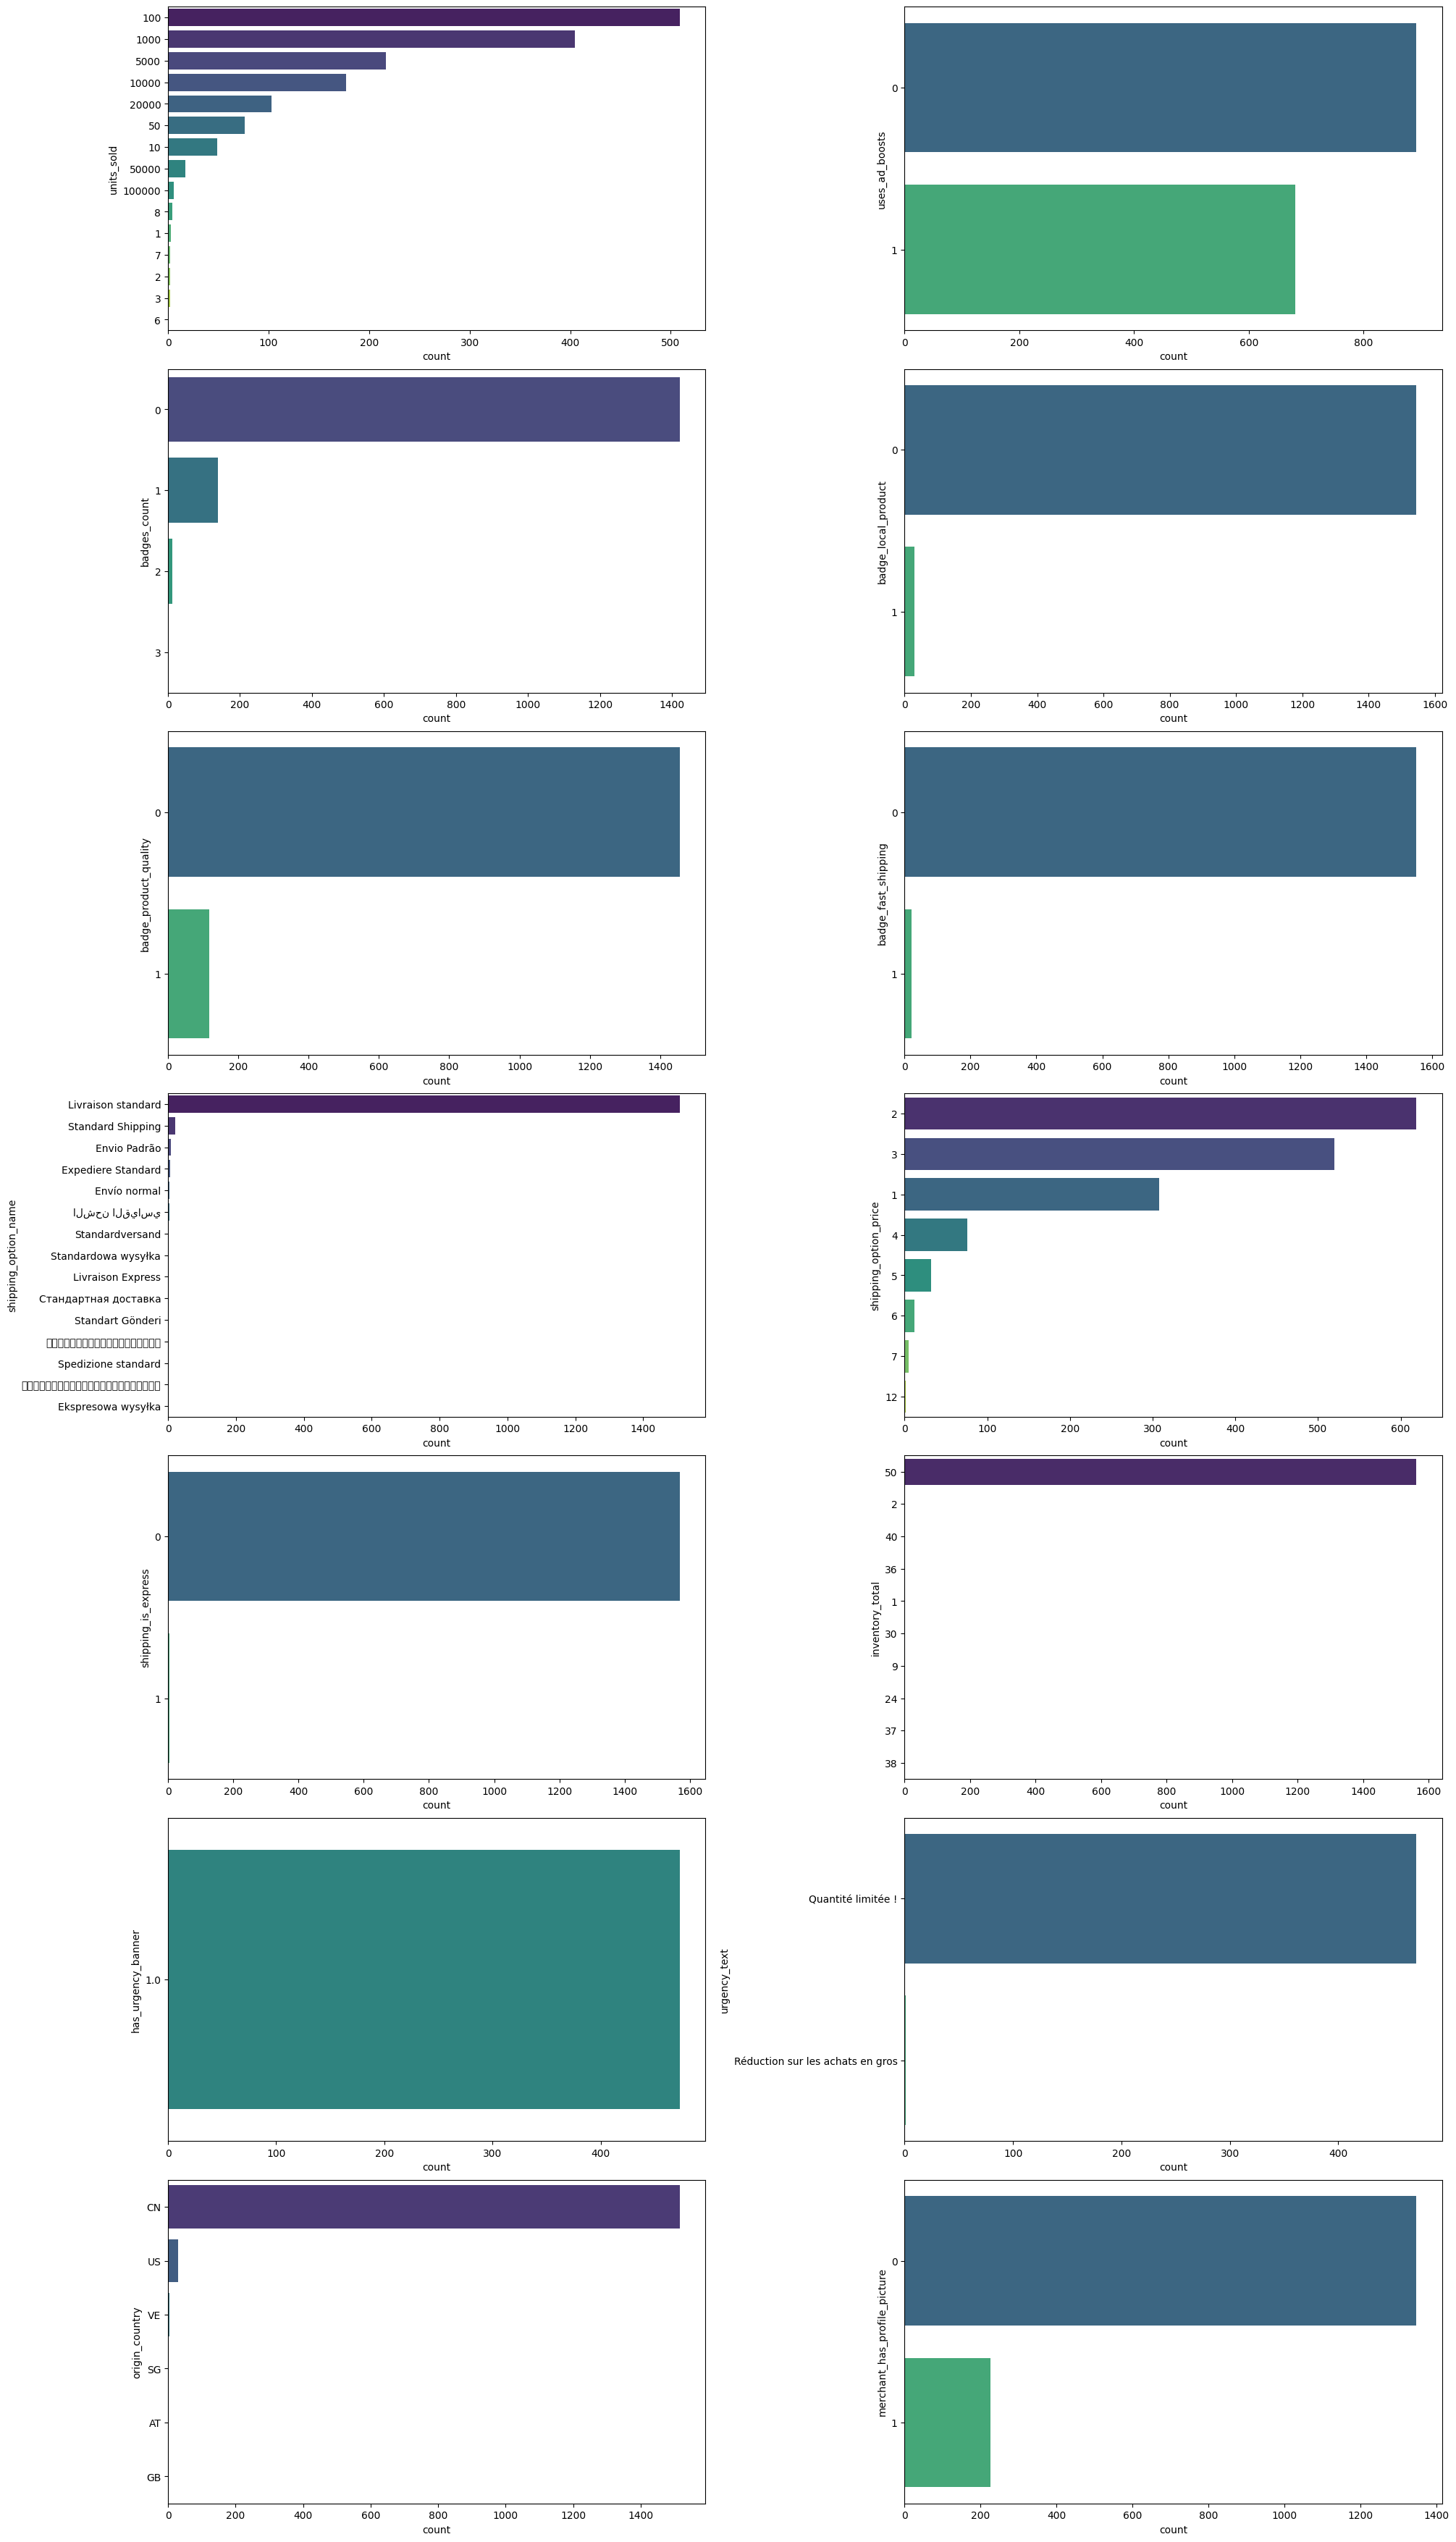

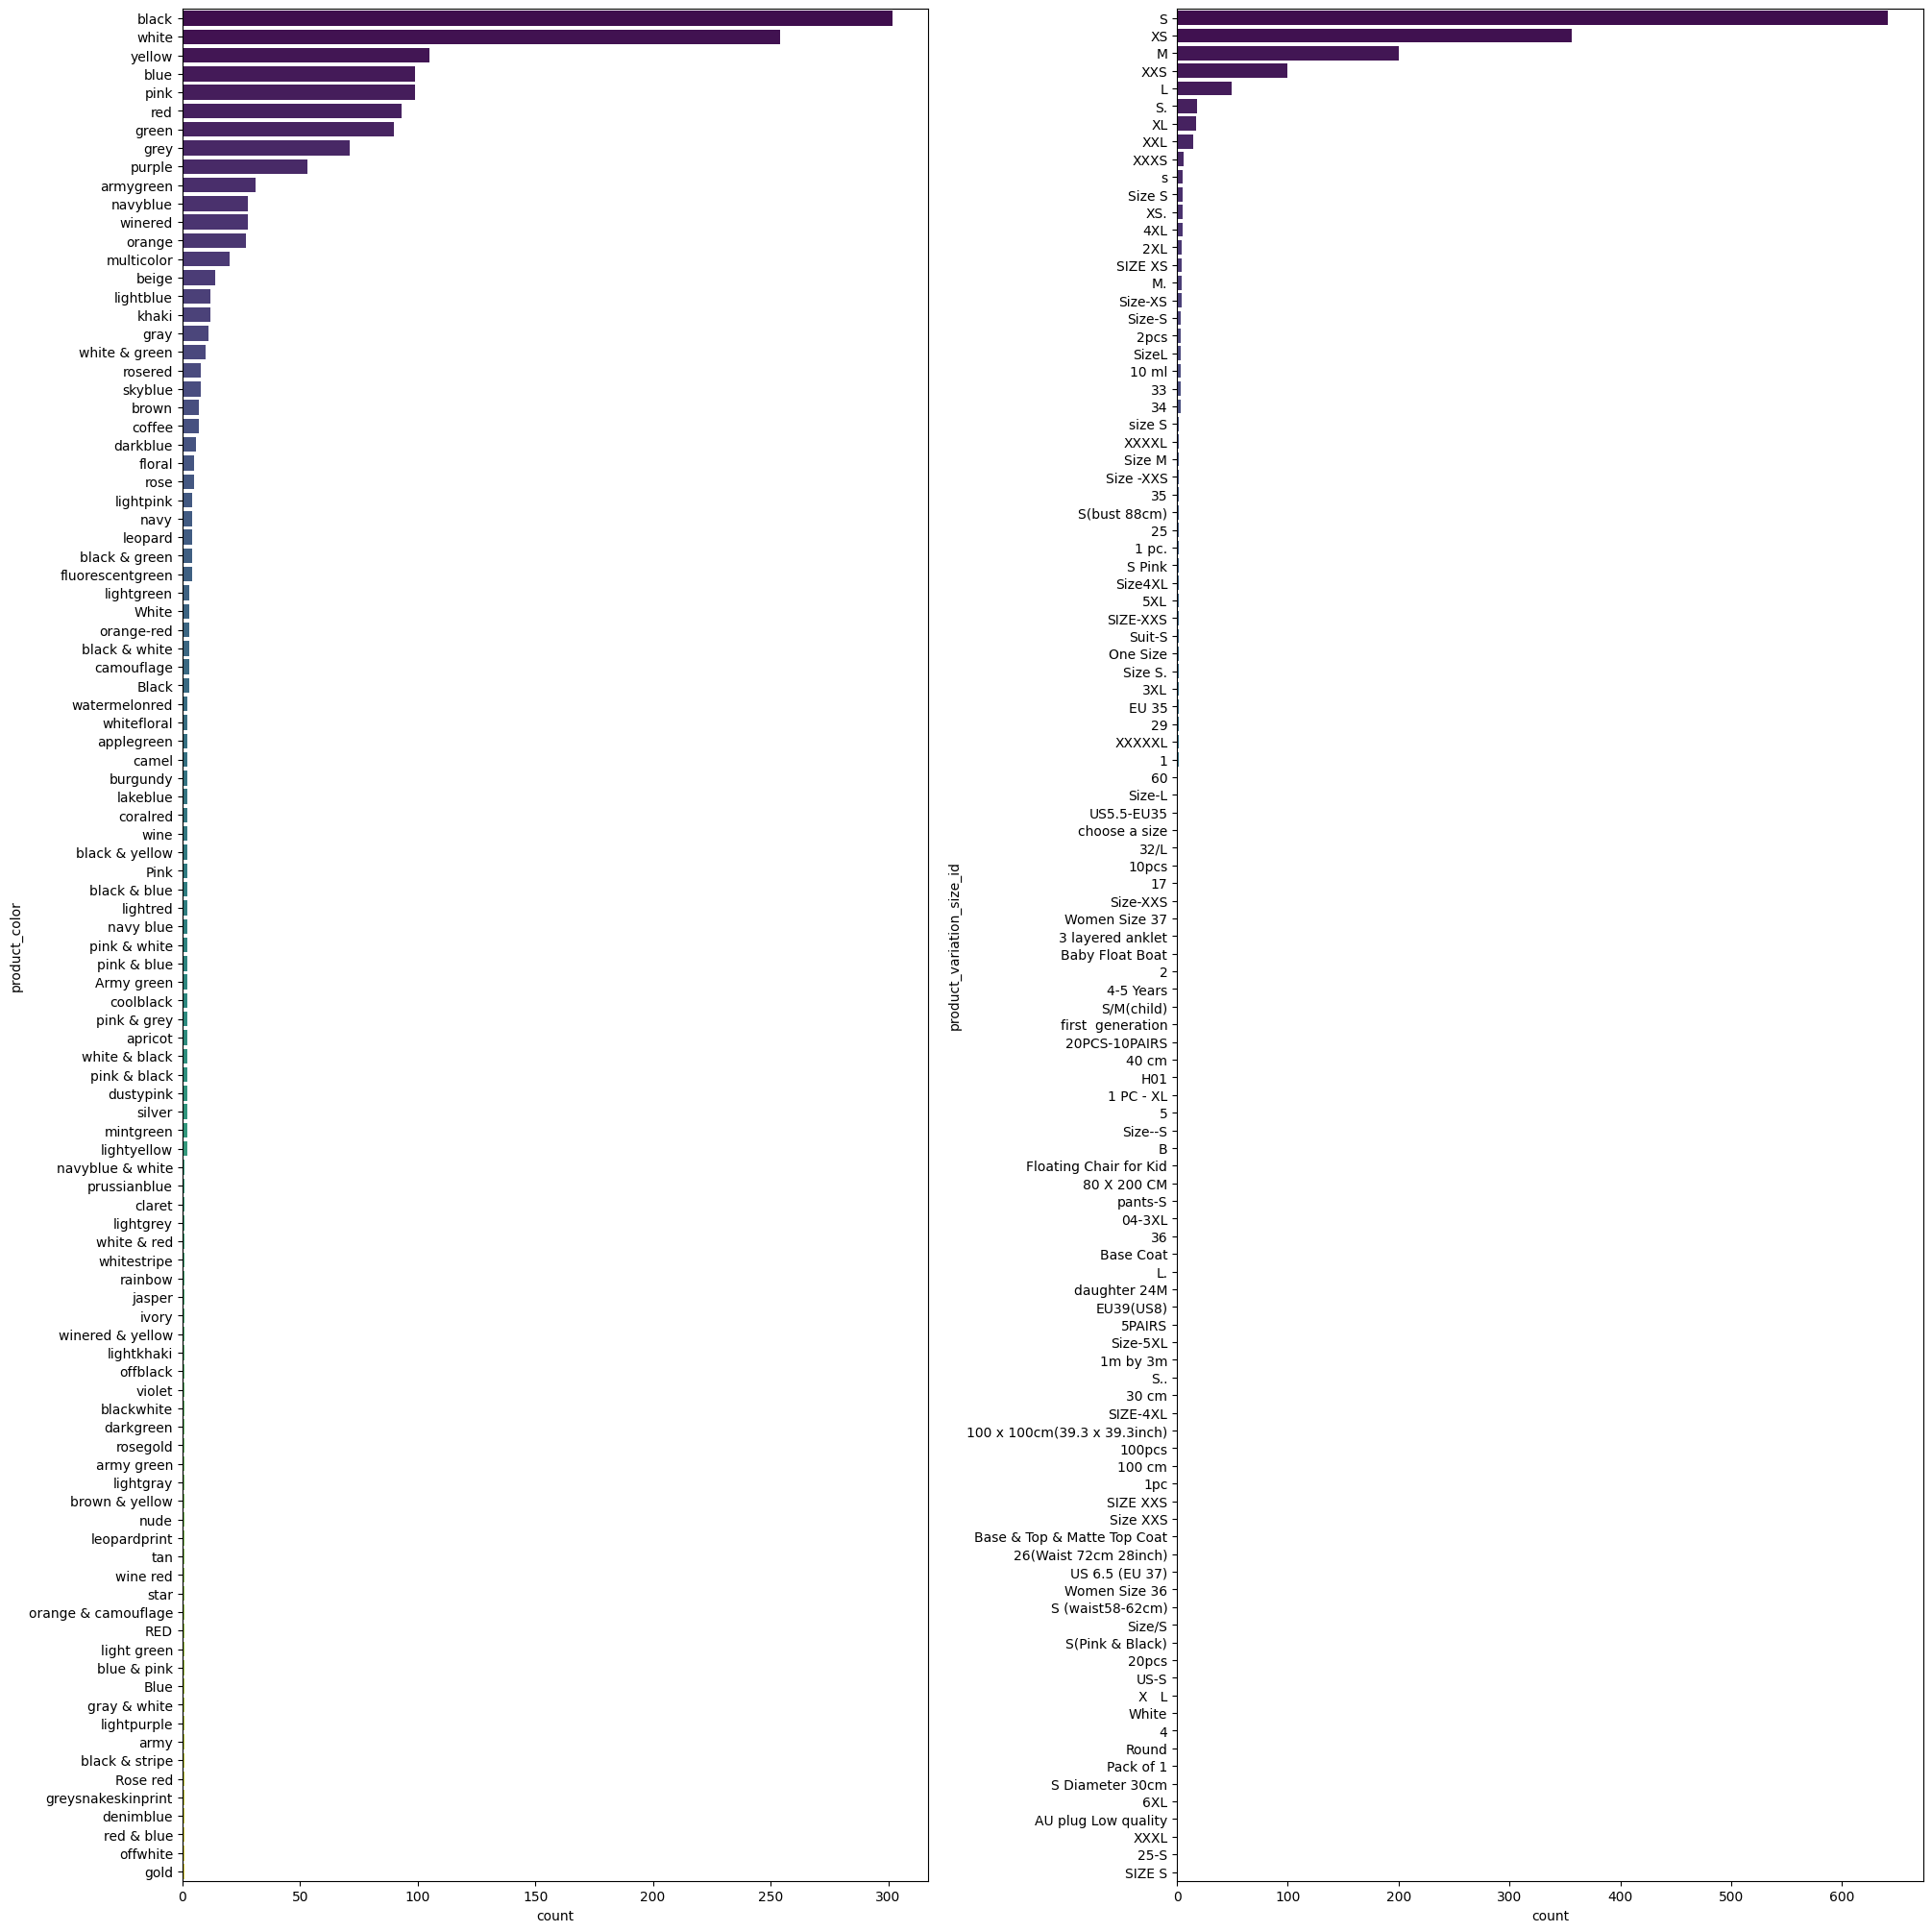

In [503]:
categorical2 = [cat for cat in df.columns if df[cat].nunique() <= 15]
fig, axs = plt.subplots(ceil(len(categorical2)/2), 2,
                        figsize=(20, 2.5*(len(categorical2))), constrained_layout=True)
for i, f in enumerate(categorical2):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

categorical2 = ["product_color", "product_variation_size_id"]
fig, axs = plt.subplots(1, 2,
                        figsize=(20, 10*(len(categorical2))), constrained_layout=True)
for i, f in enumerate(categorical2):
    sns.countplot(y=f, data=df,
                  ax=axs[i],
                  order=df[f].value_counts().index, palette='viridis')

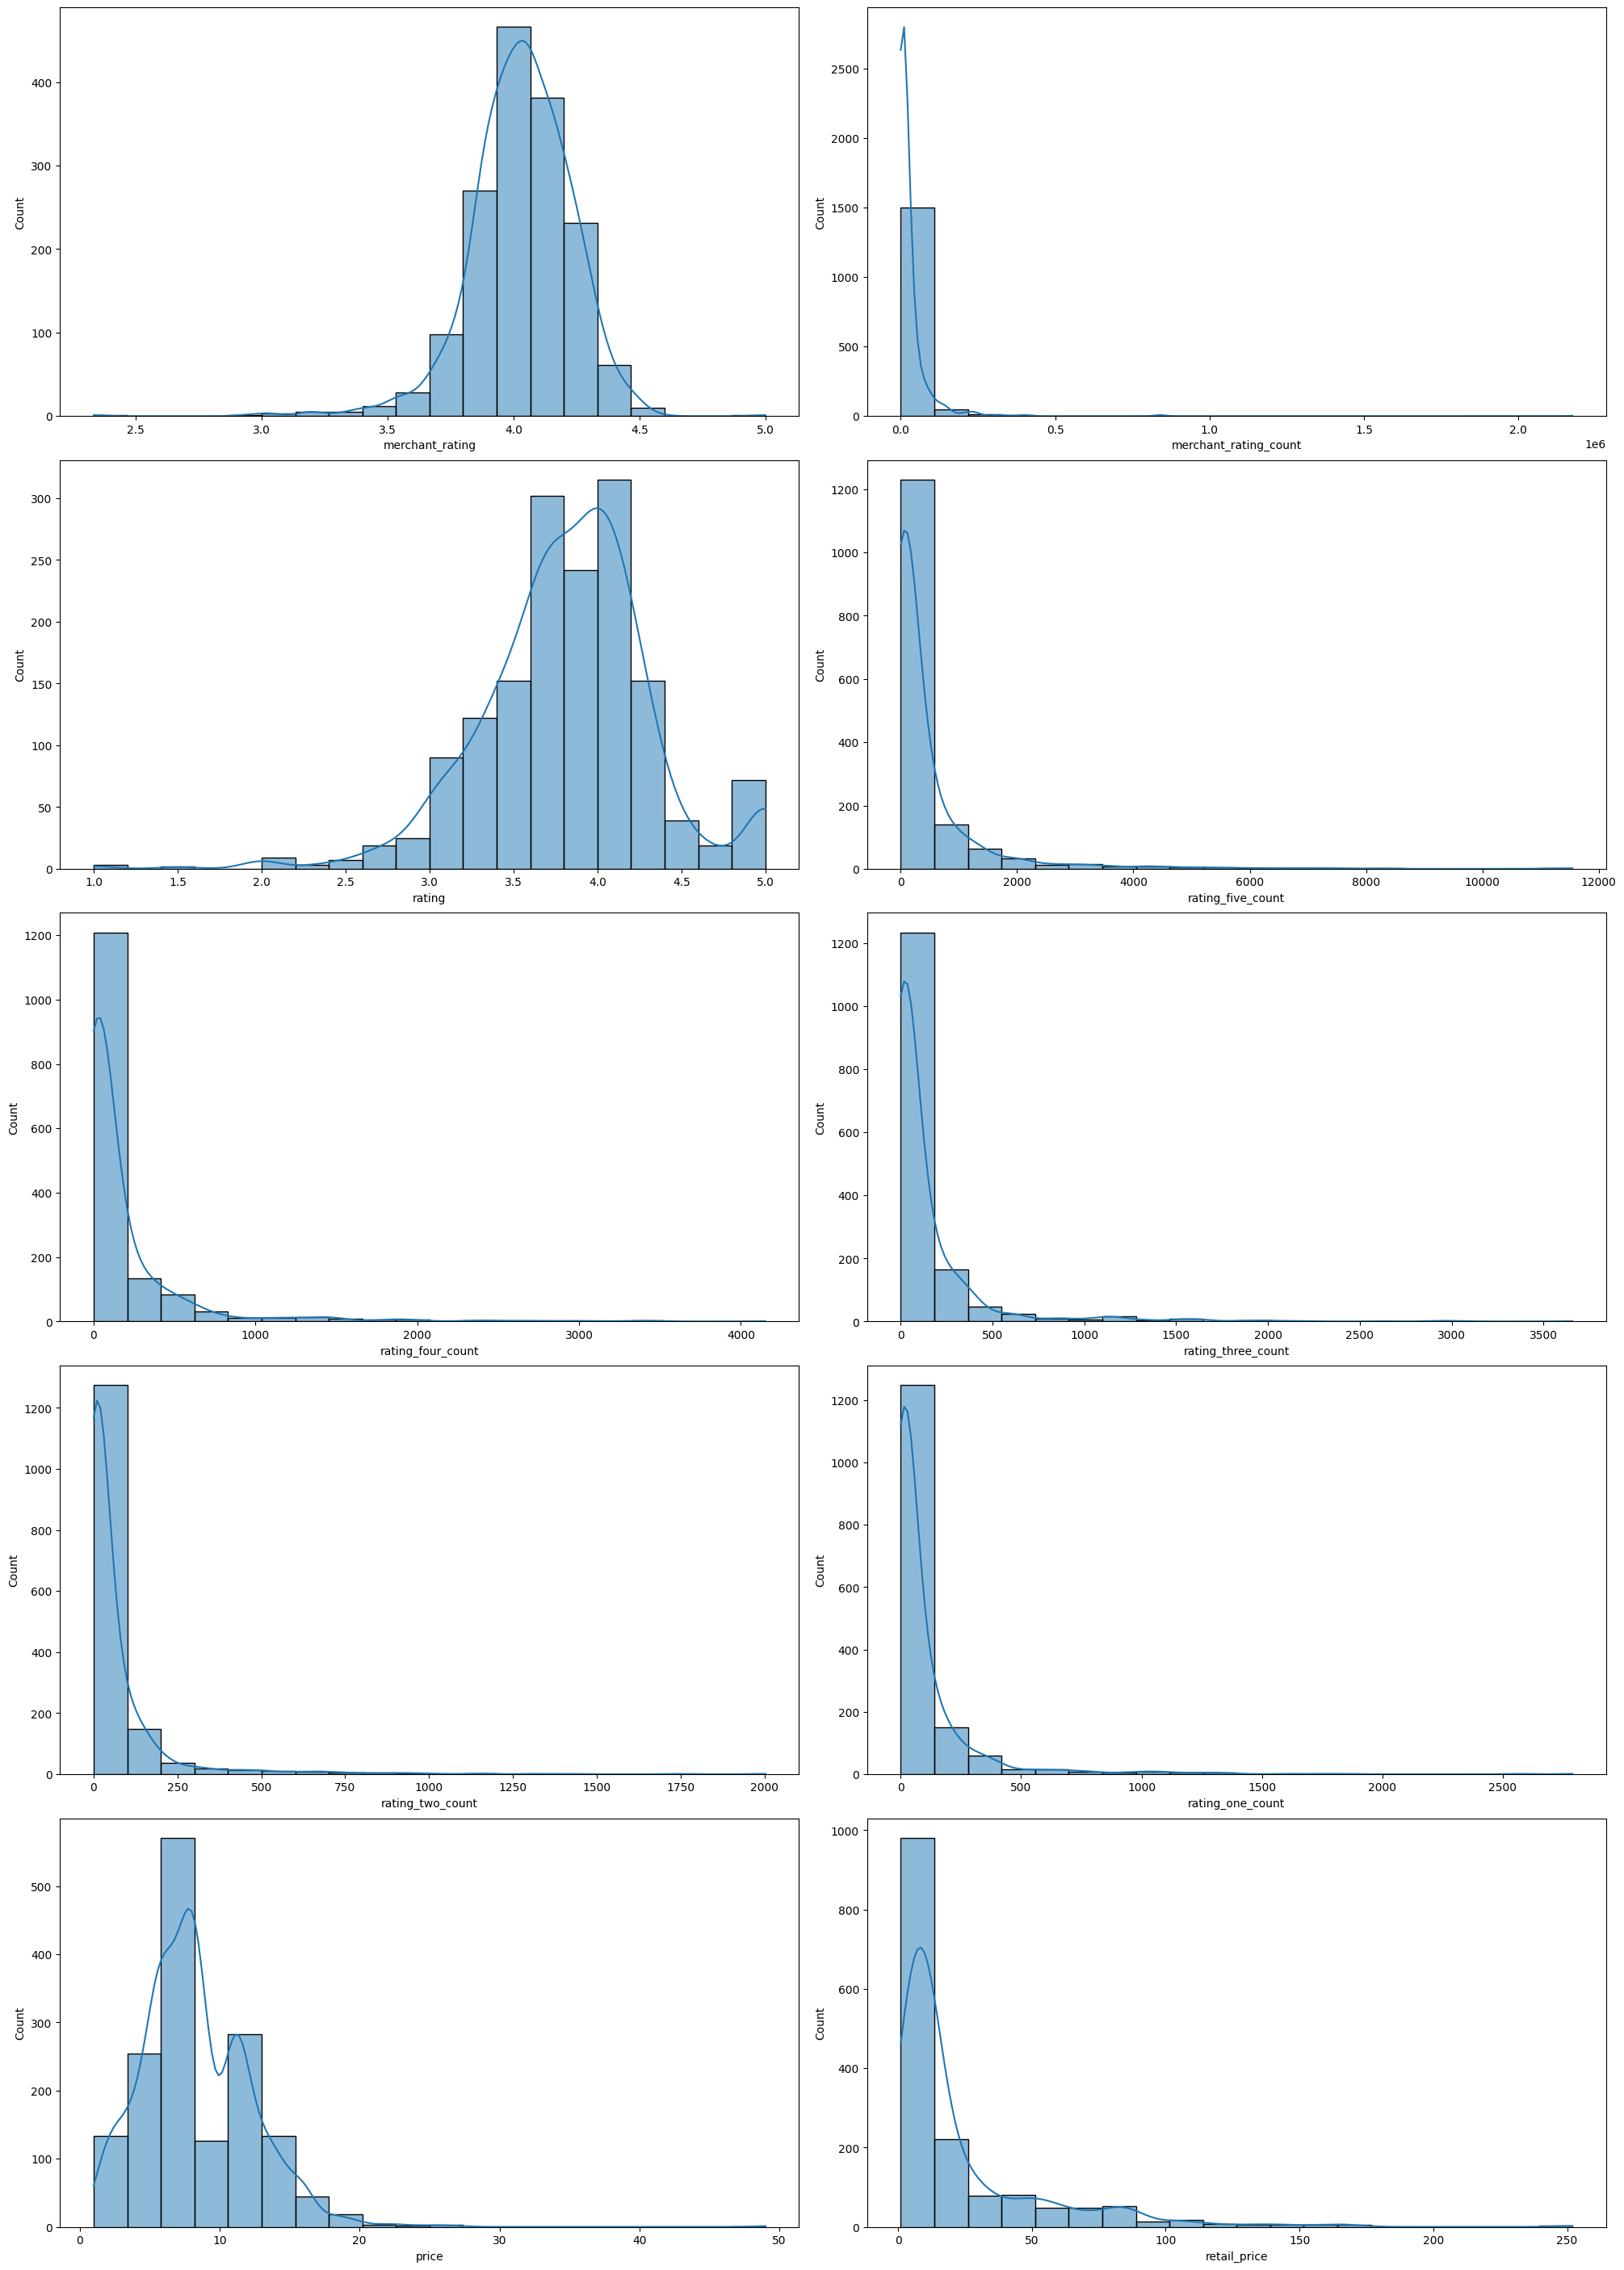

In [504]:
other_columns = ['merchant_rating', 'merchant_rating_count', 'rating', 'rating_five_count',
                 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'price', 'retail_price']
fig, axs = plt.subplots(ceil(len(other_columns)/2), 2,
                        figsize=(20, 2.8*(len(other_columns))), constrained_layout=True)
for i, f in enumerate(other_columns):
    sns.histplot(x=f, data=df, kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette="viridis")

In [505]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,17752,3.899673,0
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,295,3.989831,0
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,23832,4.020435,0
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,14482,4.001588,0


### Encodig categorical features

In [506]:
df['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

In [507]:
size_map = {
    'NaN': np.nan, np.nan: np.nan, 'choose a size': np.nan,
    'XXXS': 2, 'Size-XXXS': 2, 'SIZE XXXS': 2,
    'XXS': 3, 'Size-XXS': 3, 'SIZE XXS': 3, 'SIZE-XXS': 3, 'Size -XXS': 3,
    'XS': 4, 'XS.': 4, 'Size-XS': 4, 'SIZE XS': 4,
    's': 5, 'S': 5, 'pants-S': 5, 'S.': 5, 'S..': 5, 'Suit-S': 5,
    'Size-S': 5, 'Size S': 5, 'Size--S': 5, 'SIZE S': 5,
    'S Diameter 30cm': 5, 'size S': 5, '25-S': 5, 'S Pink': 5,
    'Size/S': 5, 'Size S.': 5, 'SIZE S': 5, 'S(bust 88cm)': 5,
    'S (waist58-62cm)': 5, 'S(Pink & Black)': 5, 'US-S': 5,
    'M': 6, 'M.': 6, 'Size-M': 6, 'Size M': 6, 'SIZE M': 6,
    '32/L': 7, 'L.': 7, 'L': 7, 'SizeL': 7, 'Size-L': 7, 'SIZE L': 7,
    'XL': 8, 'X   L': 8, 'Size-XL': 8, 'SIZE XL': 8,
    'XXL': 9, 'SizeXXL': 9, 'SIZE XXL': 9, '2XL': 9,
    'XXXL': 10, 'Size-XXXL': 10, 'SIZE XXXL': 10, '3XL': 10, '04-3XL': 10,
    'EU 35': 10, '4XL': 10, 'Size4XL': 10, 'XXXXL': 10, 'SIZE-4XL': 10,
    '5XL': 10, 'Size-5XL': 10, '6XL': 10, 'XXXXXL': 10
}

df['product_variation_size_id'] = df['product_variation_size_id'].map(size_map)
df['product_variation_size_id'] = df['product_variation_size_id'].fillna(
    np.nan)
df['product_variation_size_id'].unique()

array([ 6.,  4.,  5.,  3.,  7.,  9., nan, 10.,  8.,  2.])

In [508]:
df['product_variation_size_id'].value_counts()

product_variation_size_id
5.0     692
4.0     369
6.0     206
3.0     106
7.0      55
10.0     22
9.0      19
8.0      18
2.0       6
Name: count, dtype: int64

In [509]:
df['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [510]:
color_map = {
    'nan': 'unknown', 'floral': 'unknown', 'multicolor': 'unknown', 'rainbow': 'unknown',
    'Black': 'black', 'black': 'black', 'black & green': 'black', 'coolblack': 'black', 'black & stripe': 'black', 'black & white': 'black',
    'black & yellow': 'black', 'offblack': 'black', 'black & blue': 'black', 'blackwhite': 'black',
    'White': 'white', 'white': 'white', 'white & green': 'white', 'whitefloral': 'white', 'white & black': 'white',
    'offwhite': 'white', 'whitestripe': 'white', 'white & red': 'white', 'ivory': 'white',
    'navyblue': 'blue', 'lightblue': 'blue', 'blue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue',
    'darkblue': 'blue', 'navy': 'blue', 'blue & pink': 'blue', 'navy blue': 'blue', 'Blue': 'blue', 'denimblue': 'blue',
    'prussianblue': 'blue', 'navyblue & white': 'blue', 'Blue': 'blue',
    'winered': 'red', 'wine': 'red', 'red': 'red', 'rosered': 'red', 'rosegold': 'red', 'rose': 'red', 'orange-red': 'red', 'burgundy': 'red',
    'winered & yellow': 'red', 'watermelonred': 'red', 'jasper': 'red', 'red & blue': 'red',
    'claret': 'red', 'wine red': 'red', 'lightred': 'red', 'Red': 'red', 'RED': 'red', 'coralred': 'red', 'Rose red': 'red',
    'lightpink': 'pink', 'pink': 'pink', 'pink & black': 'pink', 'pink & grey': 'pink', 'pink & white': 'pink', 'Pink': 'pink',
    'pink & blue': 'pink', 'dustypink': 'pink',
    'armygreen': 'green', 'army green': 'green', 'army': 'green', 'green': 'green', 'lightgreen': 'green', 'light green': 'green', 'fluorescentgreen': 'green', 'darkgreen': 'green',
    'camouflage': 'green', 'Army green': 'green', 'mintgreen': 'green', 'applegreen': 'green',
    'gray': 'grey', 'grey': 'grey', 'silver': 'grey', 'greysnakeskinprint': 'grey', 'lightgray': 'grey', 'lightgrey': 'grey', 'gray & white': 'grey',
    'brown': 'brown', 'khaki': 'brown', 'coffee': 'brown', 'leopardprint': 'brown', 'beige': 'brown', 'lightkhaki': 'brown', 'leopard': 'brown',
    'tan': 'brown', 'camel': 'brown', 'nude': 'brown', 'brown & yellow': 'brown',
    'yellow': 'yellow', 'lightyellow': 'yellow', 'star': 'yellow', 'gold': 'yellow',
    'purple': 'purple', 'lightpurple': 'purple', 'violet': 'purple',
    'orange': 'orange', 'orange & camouflage': 'orange', 'apricot': 'orange',

}
# floral,multicolor,rainbow
df['product_color'] = df['product_color'].map(color_map)
df['product_color'].unique()

array(['white', 'green', 'brown', 'black', 'yellow', 'blue', 'grey',
       'orange', 'red', nan, 'pink', 'purple', 'unknown'], dtype=object)

In [511]:
# get categorical columns
categorical = df.select_dtypes(include=['object'])
print(categorical.columns)

Index(['tags', 'product_color', 'shipping_option_name', 'urgency_text',
       'origin_country'],
      dtype='object')


In [512]:
df['urgency_text'].unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

In [513]:
df.loc[df['urgency_text'] == 'Réduction sur les achats en gros',
       'urgency_text'] = 'discount'
df.loc[df['urgency_text'] == 'Quantité limitée !', 'urgency_text'] = 'limited'

In [514]:
df['shipping_option_name'].unique()

array(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน',
       'Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Стандартная доставка', 'Spedizione standard',
       'Ekspresowa wysyłka'], dtype=object)

In [515]:
df.loc[df['shipping_option_name'] ==
       'Livraison standard', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Envio Padrão', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Standart Gönderi', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Standardversand', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Envío normal', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Standardowa wysyłka', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'الشحن القياسي', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Expediere Standard', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'การส่งสินค้ามาตรฐาน', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Standard Shipping', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'ការដឹកជញ្ជូនតាមស្តង់ដារ', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Livraison Express', 'shipping_option_name'] = 'express'
df.loc[df['shipping_option_name'] ==
       'Spedizione standard', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Стандартная доставка', 'shipping_option_name'] = 'standard'
df.loc[df['shipping_option_name'] ==
       'Ekspresowa wysyłka', 'shipping_option_name'] = 'express'

In [516]:

df['shipping_option_name'].unique()

array(['standard', 'express'], dtype=object)

In [517]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,6.0,50,standard,4,0,34,50,1.0,limited,CN,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,4.0,50,standard,2,0,41,50,1.0,limited,CN,17752,3.899673,0
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",brown,4.0,1,standard,3,0,36,50,1.0,limited,CN,295,3.989831,0
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,6.0,50,standard,2,0,41,50,NaN,NaN,CN,23832,4.020435,0
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,5.0,1,standard,1,0,35,50,1.0,limited,CN,14482,4.001588,0


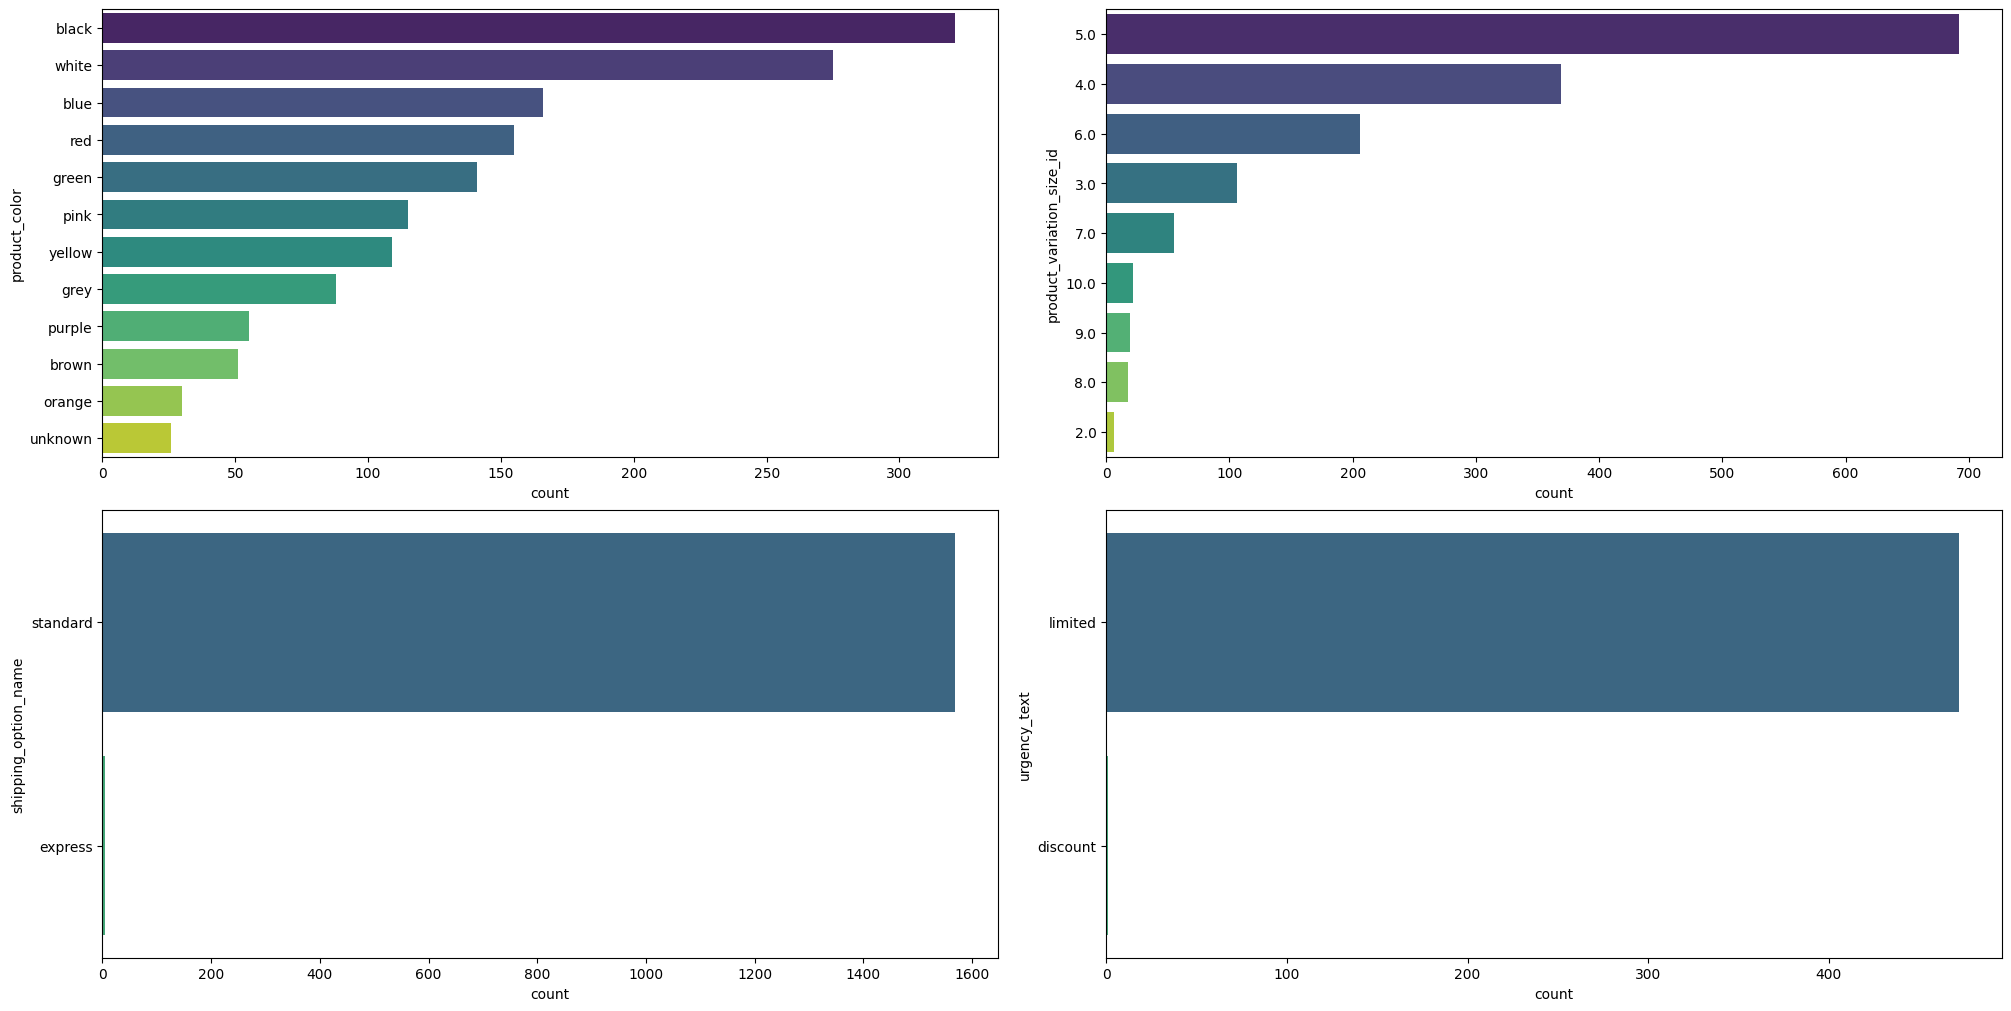

In [518]:
categorical2 = ['product_color', 'product_variation_size_id',
                'shipping_option_name', 'urgency_text']
fig, axs = plt.subplots(ceil(len(categorical2)/2), 2,
                        figsize=(20, 2.5*(len(categorical2))), constrained_layout=True)
for i, f in enumerate(categorical2):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

plt.show()

In [519]:
# one hot encoding
df = pd.get_dummies(df, columns=['product_color', 'origin_country',
                                 'shipping_option_name', 'urgency_text'])

In [520]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_color_black,product_color_blue,product_color_brown,product_color_green,product_color_grey,product_color_orange,product_color_pink,product_color_purple,product_color_red,product_color_unknown,product_color_white,product_color_yellow,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,shipping_option_name_express,shipping_option_name_standard,urgency_text_discount,urgency_text_limited
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",6.0,50,4,0,34,50,1.0,568,4.128521,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",4.0,50,2,0,41,50,1.0,17752,3.899673,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",4.0,1,3,0,36,50,1.0,295,3.989831,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",6.0,50,2,0,41,50,NaN,23832,4.020435,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",5.0,1,1,0,35,50,1.0,14482,4.001588,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True


In [521]:
tags = df['tags'].copy().str.split(',', expand=True)
df.drop(columns=['tags'], axis=0, inplace=True)
tags.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Mini,womens dresses,Summer,Patchwork,fashion dress,Dress,Mini dress,Women's Fashion,Women S Clothing,backless,party,summer dresses,sleeveless,sexy,Casual,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Summer,cardigan,women beachwear,chiffon,Sexy women,Coat,summercardigan,openfront,short sleeves,Swimsuit,Women's Fashion,leaf,Green,printed,Spring,longcardigan,Women,Beach,kimono,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,printedletterstop,Clothing,Tops,Necks,short sleeves,Women's Fashion,Women Clothing,printed,Women,tshirtforwomen,Fashion,T Shirts,Shirt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Summer,Plus Size,Lace,Casual pants,Bottom,pants,Loose,Women's Fashion,Shorts,Lace Up,Elastic,Casual,Women,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [522]:
df['has_urgency_banner'].replace({1: 1, np.nan: 0}, inplace=True)

In [523]:
df['has_urgency_banner'].unique()

array([1., 0.])

<Axes: >

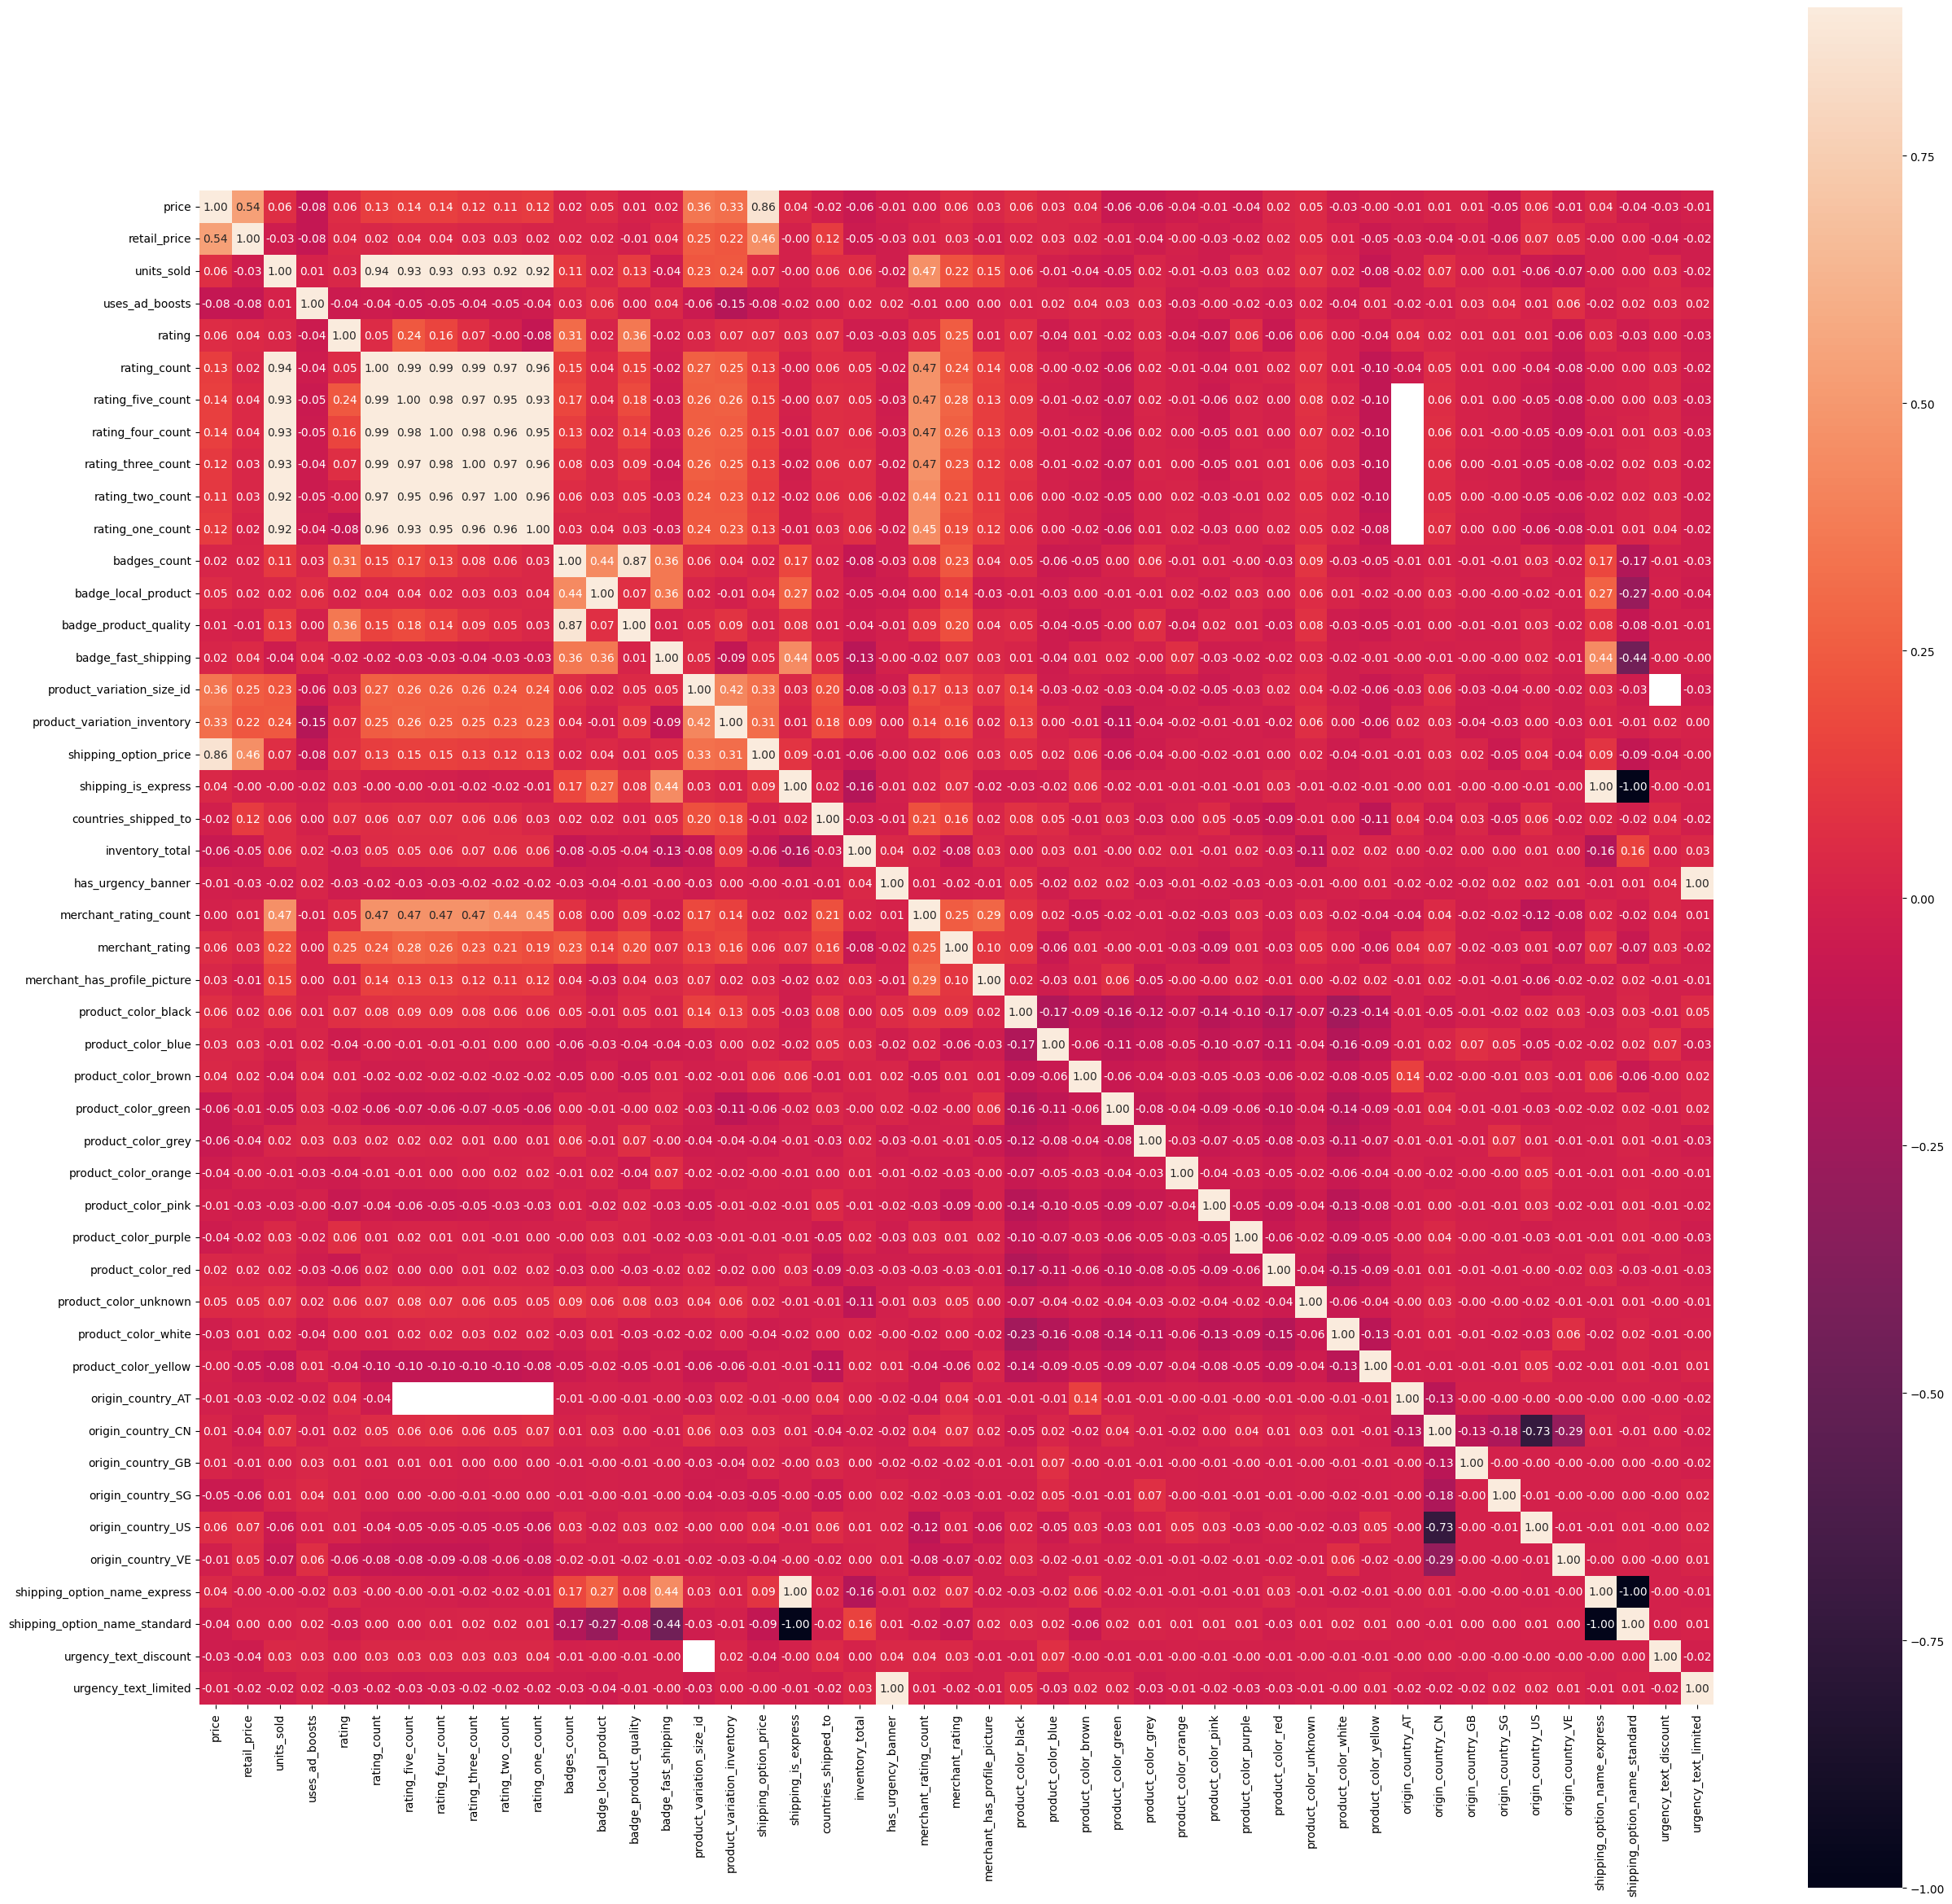

In [893]:
corr_matrix = df.corr(method="spearman")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,  vmax=.9, square=True,
            annot=True, fmt='.2f')

### Handling tags with word embeddings

In [524]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')


def generate_embeddings(strings):
    tokenized_strings = [word_tokenize(string.lower()) for string in strings]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = []
    for tokens in tokenized_strings:
        filtered_tokens.append(
            [word for word in tokens if word not in stop_words])
    model = Word2Vec(filtered_tokens,  vector_size=20,
                     window=5, min_count=1, workers=4)
    embeddings = []
    for tokens in filtered_tokens:
        embedding = []
        for word in tokens:

            embedding.append(model.wv[word])

        if len(embedding) == 0:
            embedding = np.zeros(20)
        else:
            embedding = np.array(embedding).sum(axis=0)
            embedding = embedding / np.linalg.norm(embedding)
            # embedding=embedding[-1]

        embeddings.append(embedding)

    return embeddings


df_categories = pd.read_csv('unique-categories.sorted-by-count.csv')
strings = df_categories['keyword'].tolist()
embeddings = generate_embeddings(strings)


embedding_df = pd.DataFrame(embeddings,
                            columns=['embedding'+str(i) for i in range(20)])
embedding_df['keyword'] = strings
embedding_df.set_index('keyword', inplace=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [525]:
np.array(embedding_df.loc['Summer'])

array([ 0.01170037,  0.2043885 ,  0.31774116, -0.04657277,  0.17679192,
       -0.23874483, -0.03204843,  0.3336817 , -0.0995735 , -0.39570704,
        0.23801357, -0.16026941, -0.05192265,  0.40883917, -0.09144457,
       -0.19479986, -0.21346425,  0.28568774, -0.23481295,  0.08380421])

In [526]:
df_tags_embedded = df.copy()
embedding_columns = ['embedding'+str(i) for i in range(20)]


def get_embedding(tags: pd.Series):
    tags = [x for x in tags.tolist() if x is not None]
    tags = tags if len(tags) < 10 else tags[:10]
    tag_embeddings = np.array(
        [np.array(embedding_df.loc[tag]) for tag in tags])
    if len(tag_embeddings) == 0:
        tag_embeddings = np.zeros(20)
    else:
        tag_embeddings = tag_embeddings.sum(axis=0)
        tag_embeddings = tag_embeddings/np.linalg.norm(tag_embeddings)
    return tag_embeddings


for row in range(len(tags)):
    tag_list = tags.iloc[row]
    tag_embeddings = get_embedding(tag_list)
    df_tags_embedded.loc[row, embedding_columns] = tag_embeddings

In [527]:
df_tags_embedded.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_color_black,product_color_blue,product_color_brown,product_color_green,product_color_grey,product_color_orange,product_color_pink,product_color_purple,product_color_red,product_color_unknown,product_color_white,product_color_yellow,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,shipping_option_name_express,shipping_option_name_standard,urgency_text_discount,urgency_text_limited,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,embedding10,embedding11,embedding12,embedding13,embedding14,embedding15,embedding16,embedding17,embedding18,embedding19
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,6.0,50,4,0,34,50,1.0,568,4.128521,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,0.029206,0.365023,0.164288,-0.312755,0.038190,-0.525351,0.183500,0.172898,-0.030803,-0.245152,0.054980,-0.173598,-0.193837,0.089623,-0.273058,-0.202351,0.225137,0.237913,-0.172470,-0.087903
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,4.0,50,2,0,41,50,1.0,17752,3.899673,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,0.208493,0.350243,0.461125,0.350583,0.077535,-0.114859,0.045610,0.244662,-0.183358,-0.174018,0.034467,-0.221713,-0.036142,0.042410,0.105977,0.197899,0.392204,0.105770,-0.236296,-0.169051
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,4.0,1,3,0,36,50,1.0,295,3.989831,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,-0.167951,0.079210,0.096760,0.448620,-0.152396,-0.124895,0.335016,0.230458,-0.341427,-0.118544,0.356055,0.074432,-0.048300,0.401791,-0.132964,-0.149835,0.011691,0.074561,-0.117292,-0.253837
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,6.0,50,2,0,41,50,0.0,23832,4.020435,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,-0.052272,0.432364,0.015513,-0.099644,0.147524,-0.171924,0.240025,0.476050,-0.143281,-0.100662,0.168445,0.110160,-0.106347,0.055486,0.271257,-0.119806,0.106514,0.004685,0.136294,-0.511044
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,5.0,1,1,0,35,50,1.0,14482,4.001588,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,-0.151274,0.112863,-0.193667,-0.229123,0.131851,-0.208071,-0.122424,0.142602,0.085166,-0.190579,0.190961,-0.151898,0.194614,-0.050247,0.352861,-0.260506,0.404602,0.193864,-0.456905,-0.180104


### Handling tags with one-hot encoding

In [378]:
tags_dict = {'Dress': 'dress',
             'Tops': 'tops',
             'Shorts': 'shorts',
             'sexy': 'sexy',
             'Beach': 'beach',
             'Sleeve': 'sleeve',
             'short sleeves': 'sleeve',
             'Print': 'print',
             'Shirt': 'tops',
             'Tank': 'tops',
             'Necks': 'tops',
             'V-neck': 'tops',
             'printed': 'print',
             'T Shirts': 'tops',
             'tank top': 'tops',
             'Cotton': 'cotton',
             'summer dress': 'dress',
             'Loose': 'loose',
             'blouse': 'tops',
             'pants': 'pants',
             'Vest': 'vest',
             'beach dress': 'beach',
             'women dress': 'dress',
             'Floral': 'floral',
             'Lace': 'lace',
             'Mini dress': 'mini',
             'Mini': 'mini',
             'slim': 'slim',
             'Sleeveless dress': 'dress',
             'Round neck': 'tops',
             'casual dress': 'dress',
             'long dress': 'dress',
             'Party Dress': 'dress',
             'Sport': 'sport',
             'Floral print': 'floral',
             'Slim Fit': 'slim',
             'backless': 'backless'}
tags_dict_2 = {
    'Shorts': 'shorts',

    'sexy': 'sexy',
    'Beach': 'beach',
    'Sleeve': 'sleeve',
    'short sleeves': 'sleeve',
    'Print': 'print',
    'Tank': 'tank',
    'V-neck': 'vneck',
    'printed': 'print',
               'tank top': 'tank',
               'summer dress': 'summer',
               'Loose': 'loose',
               'blouse': 'blouse',
               'pants': 'pants',
               'Vest': 'vest',
               'beach dress': 'beach',
               'Floral': 'floral',
               'Lace': 'lace',
               'Mini dress': 'mini',
               'Mini': 'mini',
               'slim': 'slim',
               'Sleeveless dress': 'sleeveless',
               'Round neck': 'roundneck',
               'casual dress': 'casual',
               'party': 'party',
               'long dress': 'long',
               'Party Dress': 'party',
               'Sport': 'sport',
               'Floral print': 'floral',
               'Slim Fit': 'slim',
               'backless': 'party'}

len(set(tags_dict.values()))

17

In [379]:
df_tags_coded = df.copy()
df_tags_coded.loc[:, list(set(tags_dict.values()))] = 0
for i in range(len(tags)):
    tag_list = tags.iloc[i]
    tag_list = [tags_dict[tag] for tag in tag_list if tag in tags_dict]
    tag_list = list(set(tag_list))
    df_tags_coded.loc[i, tag_list] = 1

In [380]:
df_tags_coded.tail()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_color_black,product_color_blue,product_color_brown,product_color_green,product_color_grey,product_color_orange,product_color_pink,product_color_purple,product_color_red,product_color_unknown,product_color_white,product_color_yellow,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,shipping_option_name_express,shipping_option_name_standard,urgency_text_discount,urgency_text_limited,sport,floral,mini,vest,beach,sexy,pants,lace,shorts,loose,backless,dress,cotton,print,sleeve,slim,tops
1568,6.0,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,5.0,50,2,0,41,50,0.0,5316,4.224605,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
1569,2.0,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,5.0,2,1,0,26,50,1.0,4435,3.696054,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1570,5.0,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,5.0,15,2,0,11,50,0.0,210,3.961905,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1571,13.0,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,5.0,36,3,0,29,50,0.0,31,3.774194,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
1572,7.0,6,100,1,4.07,14,8.0,3.0,1.0,0.0,2.0,0,0,0,0,5.0,50,2,0,41,50,0.0,7023,4.235939,0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [546]:
data = df.copy()

In [547]:
def log_transform(df, column):
    minimum = df[column].min()
    if minimum <= 0:
        df[column] = df[column] - minimum + 1
    df[column] = np.log(df[column])
    return df


cols_for_log_transform = ['merchant_rating_count', 'rating_five_count', 'rating_four_count',
                          'rating_three_count', 'rating_two_count', 'rating_one_count', 'retail_price']
for col in cols_for_log_transform:
    data = log_transform(data, col)

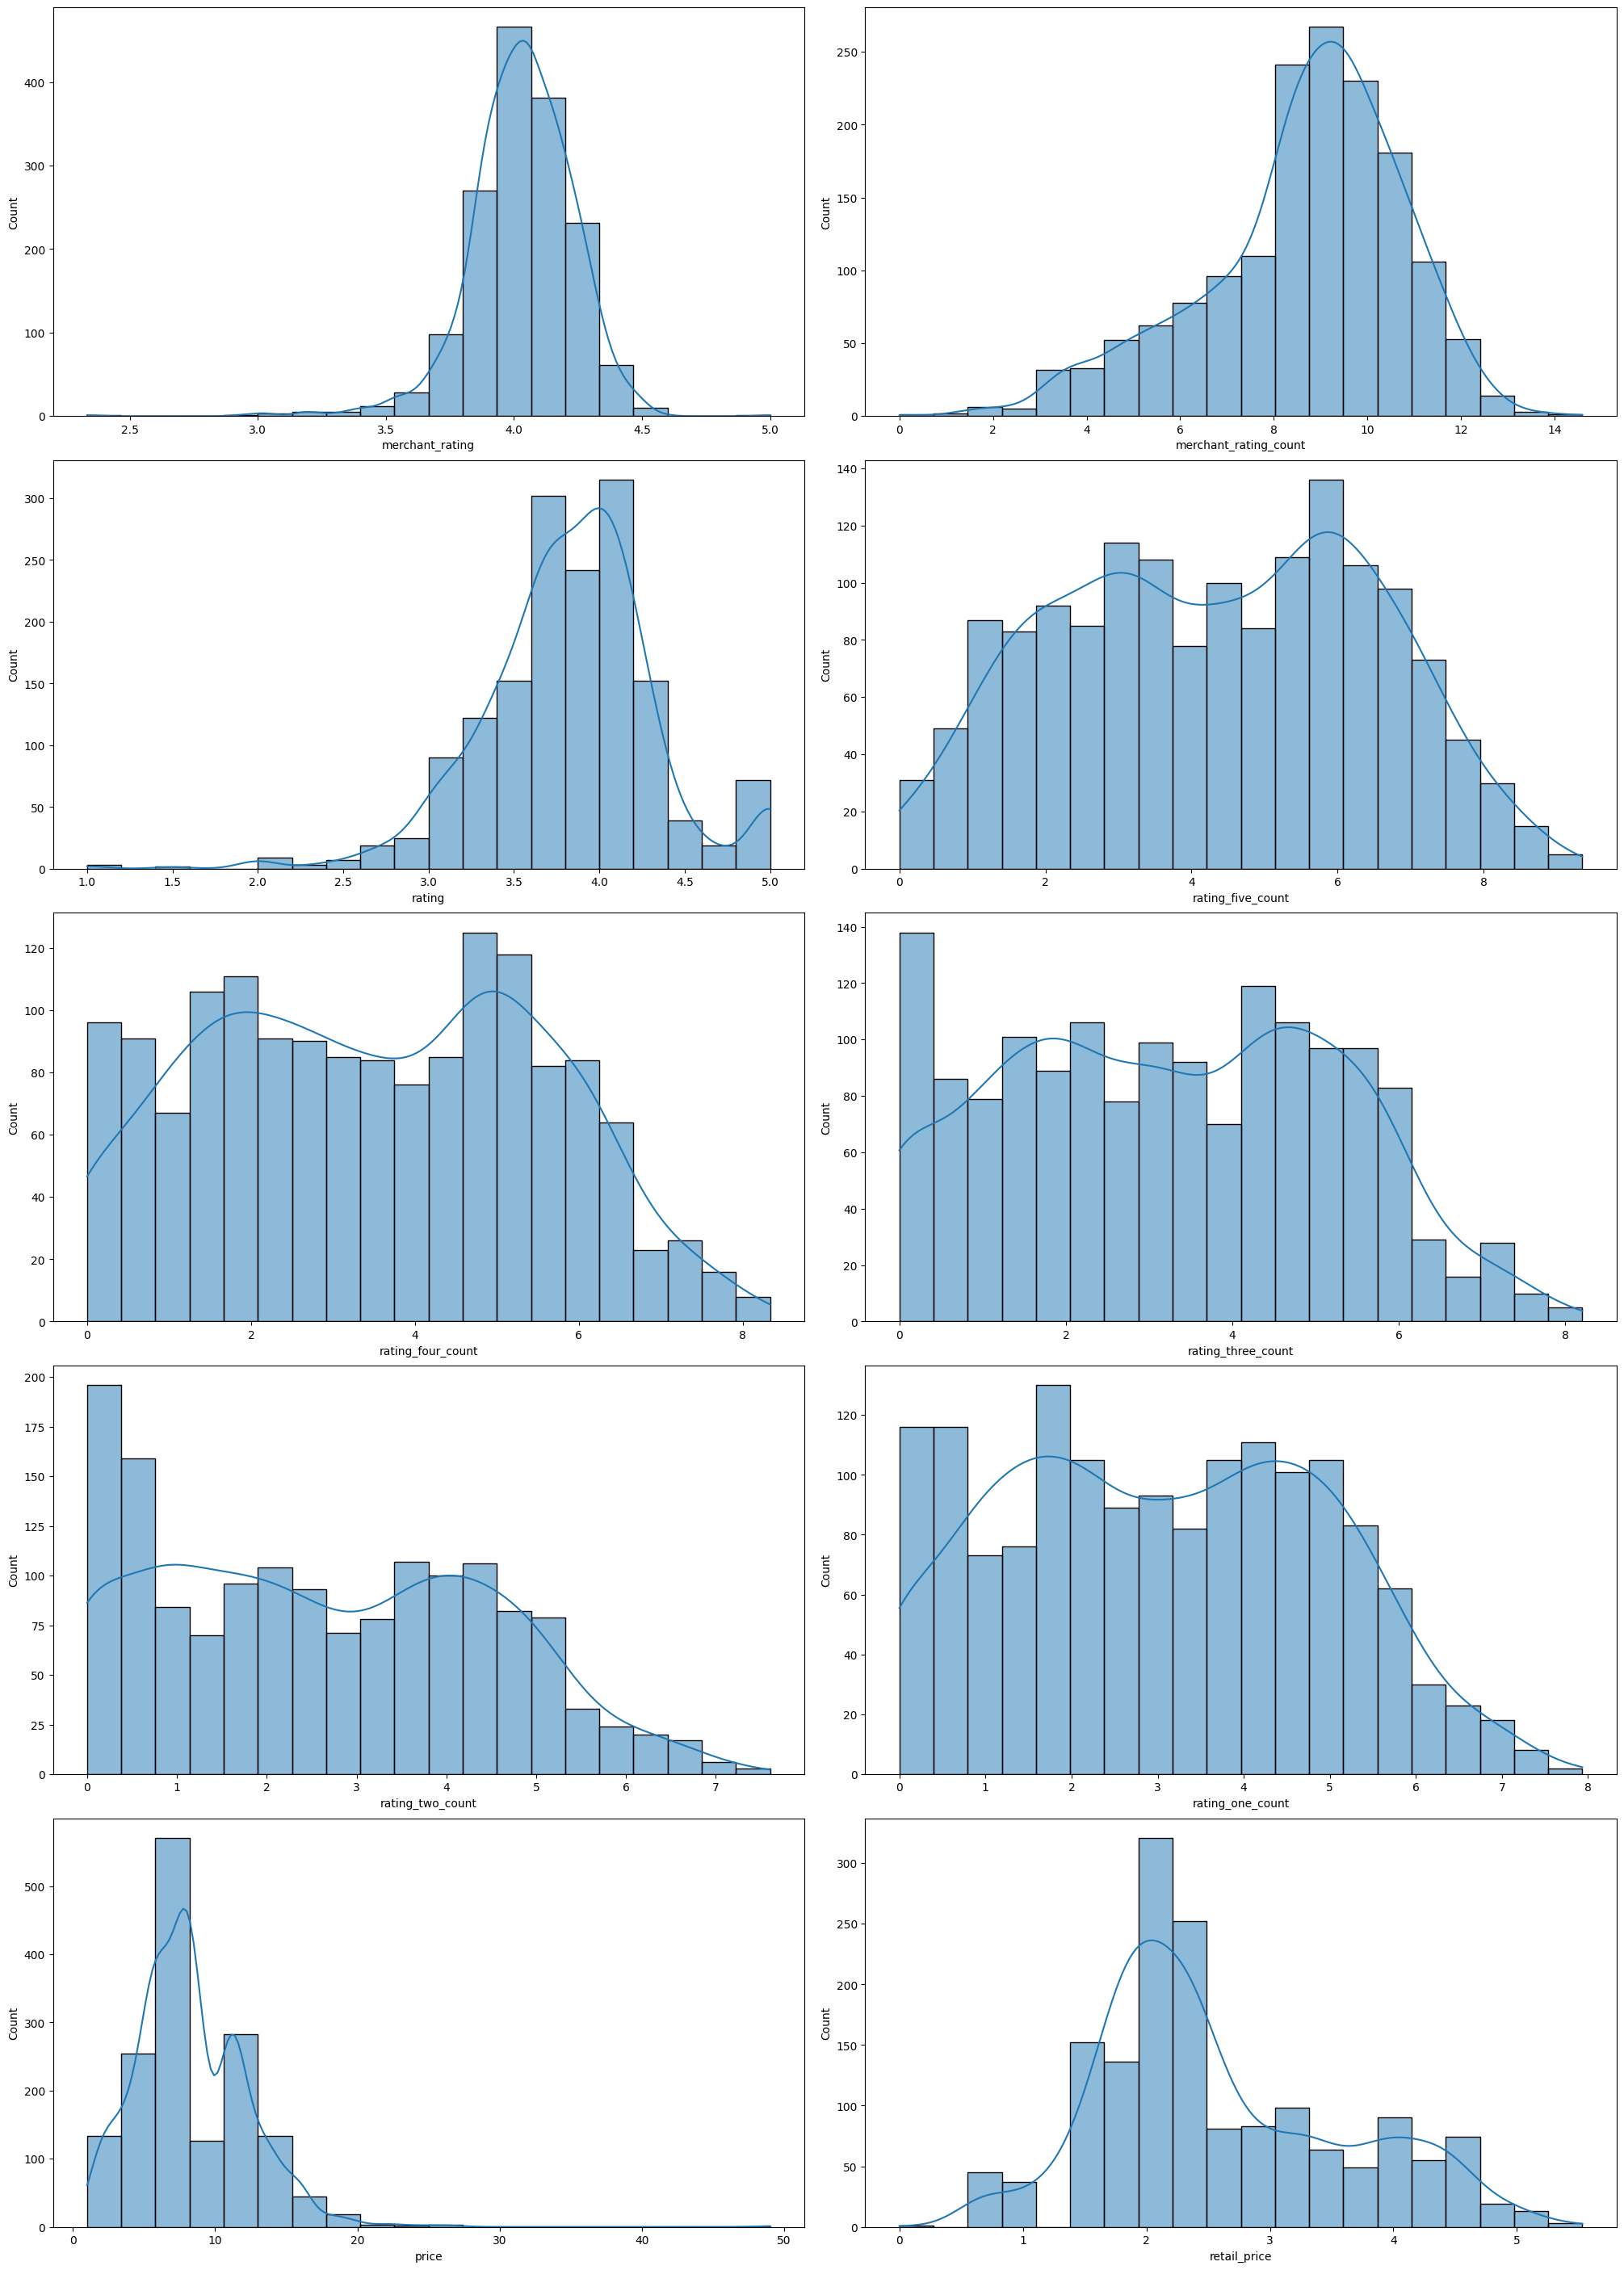

In [548]:
other_columns = ['merchant_rating', 'merchant_rating_count', 'rating', 'rating_five_count',
                 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'price', 'retail_price']
fig, axs = plt.subplots(ceil(len(other_columns)/2), 2,
                        figsize=(20, 2.8*(len(other_columns))), constrained_layout=True)
for i, f in enumerate(other_columns):
    sns.histplot(x=f, data=data, kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette="viridis")

In [549]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1-1.5*IQR) & (df[column] <= Q3+1.5*IQR)]
    return df


data = remove_outliers_iqr(data, 'price')
data = remove_outliers_iqr(data, 'rating')
data = remove_outliers_iqr(data, 'merchant_rating')

In [551]:
cols_to_scale = ['retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_price', 'shipping_is_express',
                 'countries_shipped_to', 'inventory_total', 'merchant_rating_count', 'merchant_has_profile_picture', 'price', 'rating', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'merchant_rating']

scaler = MinMaxScaler((-1, 1))
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [552]:
# check for nan values
nan_counts = data.isna().sum()
nan_counts[nan_counts > 0]

product_variation_size_id    67
dtype: int64

In [553]:
finite_count = np.isfinite(data).sum()
finite_count[finite_count != 1573]

price                            1419
retail_price                     1419
units_sold                       1419
uses_ad_boosts                   1419
rating                           1419
rating_count                     1419
rating_five_count                1419
rating_four_count                1419
rating_three_count               1419
rating_two_count                 1419
rating_one_count                 1419
badges_count                     1419
badge_local_product              1419
badge_product_quality            1419
badge_fast_shipping              1419
product_variation_size_id        1352
product_variation_inventory      1419
shipping_option_price            1419
shipping_is_express              1419
countries_shipped_to             1419
inventory_total                  1419
has_urgency_banner               1419
merchant_rating_count            1419
merchant_rating                  1419
merchant_has_profile_picture     1419
product_color_black              1419
product_colo

In [558]:
# convert all bool to int
data.columns
data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.00000,1419.000000,1419.000000,1419.000000,1419.000000
mean,-0.154087,-0.073039,-0.904915,-0.136011,0.024423,-0.905850,-0.033191,-0.117902,-0.166987,-0.270272,-0.192904,-0.925769,-0.963354,-0.839323,-0.974630,0.340582,-0.563542,-0.995772,-0.482987,0.99396,0.302326,0.017277,0.009829,-0.689922
std,0.412966,0.363890,0.194568,0.991057,0.353391,0.199225,0.434541,0.470893,0.469401,0.473505,0.458963,0.231108,0.268326,0.543824,0.223901,0.862479,0.305000,0.091895,0.303076,0.09555,0.459427,0.327887,0.359342,0.724138
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,0.000000,-1.000000,-1.000000,-1.000000
25%,-0.430588,-0.296162,-0.998200,-1.000000,-0.200000,-0.996625,-0.382026,-0.500829,-0.563249,-0.711002,-0.594283,-1.000000,-1.000000,-1.000000,-1.000000,-0.755102,-0.666667,-1.000000,-0.626866,1.00000,0.000000,-0.143126,-0.233314,-1.000000
50%,-0.176471,-0.167153,-0.980198,-1.000000,0.051163,-0.979655,-0.019715,-0.114483,-0.179203,-0.287627,-0.188566,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-0.666667,-1.000000,-0.492537,1.00000,0.000000,0.057595,0.002474,-1.000000
75%,0.176471,0.164271,-0.900190,1.000000,0.274419,-0.909845,0.306894,0.247901,0.208865,0.113813,0.173199,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-0.333333,-1.000000,-0.447761,1.00000,1.000000,0.238841,0.258037,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [555]:
if 'product_variation_size_id' in data.columns:
    data.drop(columns=['product_variation_size_id'], axis=0, inplace=True)

In [556]:
data.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture',
       'product_color_black', 'product_color_blue', 'product_color_brown',
       'product_color_green', 'product_color_grey', 'product_color_orange',
       'product_color_pink', 'product_color_purple', 'product_color_red',
       'product_color_unknown', 'product_color_white', 'product_color_yellow',
       'origin_country_AT', 'origin_country_CN', 'origin_country_GB',
       'origin_country_SG', 'origin_country_US', 'origin_country_VE',
      

In [557]:
data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_color_black,product_color_blue,product_color_brown,product_color_green,product_color_grey,product_color_orange,product_color_pink,product_color_purple,product_color_red,product_color_unknown,product_color_white,product_color_yellow,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,shipping_option_name_express,shipping_option_name_standard,urgency_text_discount,urgency_text_limited
0,0.764706,-0.045450,-0.99820,-1.0,-0.023256,-0.994986,-0.295336,-0.472556,-0.415500,-0.817662,-0.419550,-1.0,-1.0,-1.0,-1.0,1.0,2.220446e-16,-1.0,-0.582090,1.0,1.0,-0.416304,0.175883,-1.0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True
1,-0.176471,0.118033,-0.60016,1.0,-0.311628,-0.408639,0.652179,0.664838,0.711210,0.701785,0.760283,-1.0,-1.0,-1.0,-1.0,1.0,-6.666667e-01,-1.0,-0.477612,1.0,1.0,0.174429,-0.315284,-1.0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2,-0.176471,0.360430,-0.99820,-1.0,-0.200000,-0.998843,-0.616914,-0.613654,-0.732207,-1.000000,-0.650534,-1.0,-1.0,-1.0,-1.0,-1.0,-3.333333e-01,-1.0,-0.552239,1.0,1.0,-0.528516,-0.121783,-1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
3,-0.176471,-0.247864,-0.90019,1.0,0.227907,-0.944364,0.216623,0.149239,0.091375,-0.010588,-0.089738,-1.0,-1.0,-1.0,-1.0,1.0,-6.666667e-01,-1.0,-0.477612,1.0,0.0,0.224999,-0.056099,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,-0.797647,-0.602631,-0.99820,1.0,-0.637209,-0.998264,-0.583956,-0.613654,-0.732207,-0.711002,-0.509463,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.0,-0.567164,1.0,1.0,0.139474,-0.096548,-1.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True


In [542]:
# drop index column if data has index column
if 'index' in data.columns:
    data.drop(columns=['index'], axis=0, inplace=True)

In [538]:
from sklearn.impute import KNNImputer
data.reset_index(inplace=True)
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

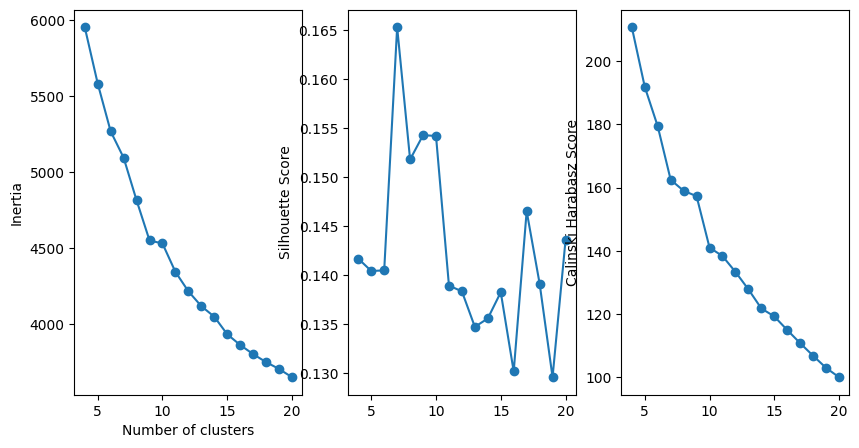

In [559]:
k_range = range(4, 21)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(data, kmeans.labels_))
    calinski.append(metrics.calinski_harabasz_score(data, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

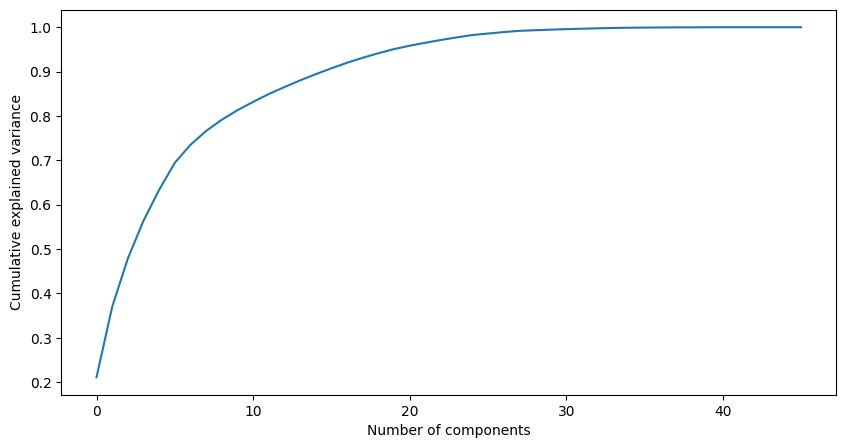

In [560]:
# apply pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
data_pca = pca.transform(data)

# plot pca
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [561]:
pca = PCA(n_components=0.95)
pca.fit(data)
data_pca = pca.transform(data)

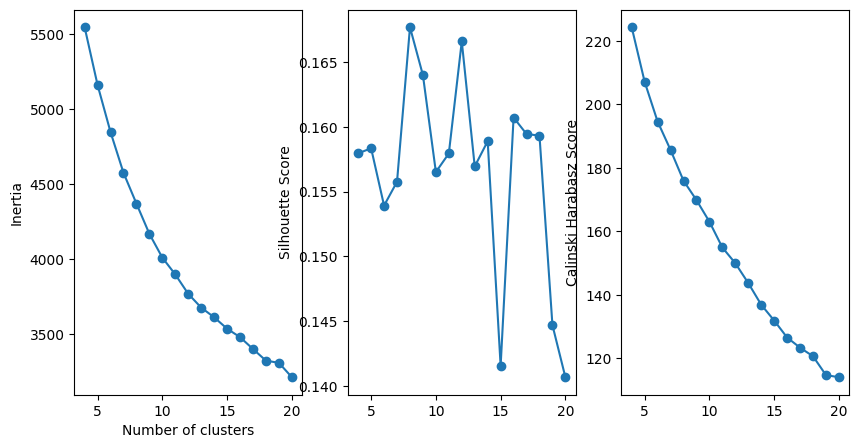

In [562]:
k_range = range(4, 21)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(data_pca, kmeans.labels_))
    calinski.append(metrics.calinski_harabasz_score(data_pca, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()